# CartPole

In [1]:
# --- Imports ---
import os
import sys
import random
import pickle
import gymnasium as gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# --- GPU Configuration ---
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# --- Add Modules directory to Python path ---
module_path = os.path.abspath(os.path.join('.', 'Modules'))

if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")
else:
    print(f"'{module_path}' already in sys.path")

# --- Import custom modules ---
from env_partial_cartpole import CartPolePartialObservation
from actor_critic_song import ActorCriticAgent
from reinforce_song import train_agent
from helper_functions import plot_metrics, plot_firing_rates, load_model, save_model

# --- Set Random Seeds ---
seed_value = 1
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

print("Setup Complete.")

2025-06-05 15:04:02.741593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749128644.325958  182377 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749128644.739976  182377 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749128648.533749  182377 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749128648.533796  182377 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749128648.533799  182377 computation_placer.cc:177] computation placer alr

Added '/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código 2/Modules' to sys.path
Setup Complete.


### FFNN Full

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 500
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 20
  record_history: 1
Creating base environment: CartPole-v1
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...


2025-06-05 12:11:26.392701: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 500 episodes...
Episode 20	Total Reward: 23.00	State [ 0.15662767  0.3753493  -0.2062361  -0.86371845]	Actor Loss: 5.6589	Critic Loss: 110.8585
Episode 40	Total Reward: 24.00	State [ 0.15530995  1.0313364  -0.19770591 -1.6534934 ]	Actor Loss: -0.3970	Critic Loss: 53.2727
Episode 60	Total Reward: 10.00	State [ 0.06132283  0.97139376 -0.2044418  -1.698722  ]	Actor Loss: -4.6683	Critic Loss: 50.8635
Episode 80	Total Reward: 41.00	State [ 0.2572689   1.5070003  -0.20392722 -2.0340083 ]	Actor Loss: 6.2642	Critic Loss: 239.1491
Episode 100	Total Reward: 48.00	State [-0.11354741 -0.5424947   0.1911725   0.94444126]	Actor Loss: 7.5445	Critic Loss: 314.1491
Episode 120	Total Reward: 29.00	State [-0.08609605 -0.03716337  0.20738979  0.605879  ]	Actor Loss: -0.0630	Critic Loss: 70.6844
Episode 140	Total Reward: 41.00	State [-0.15567209 -0.38039374 -0.2061897  -0.5602368 ]	Actor Loss: 1.5381	Critic Loss: 124.2138
Episode 160	Total Reward: 71.00	State [0.121

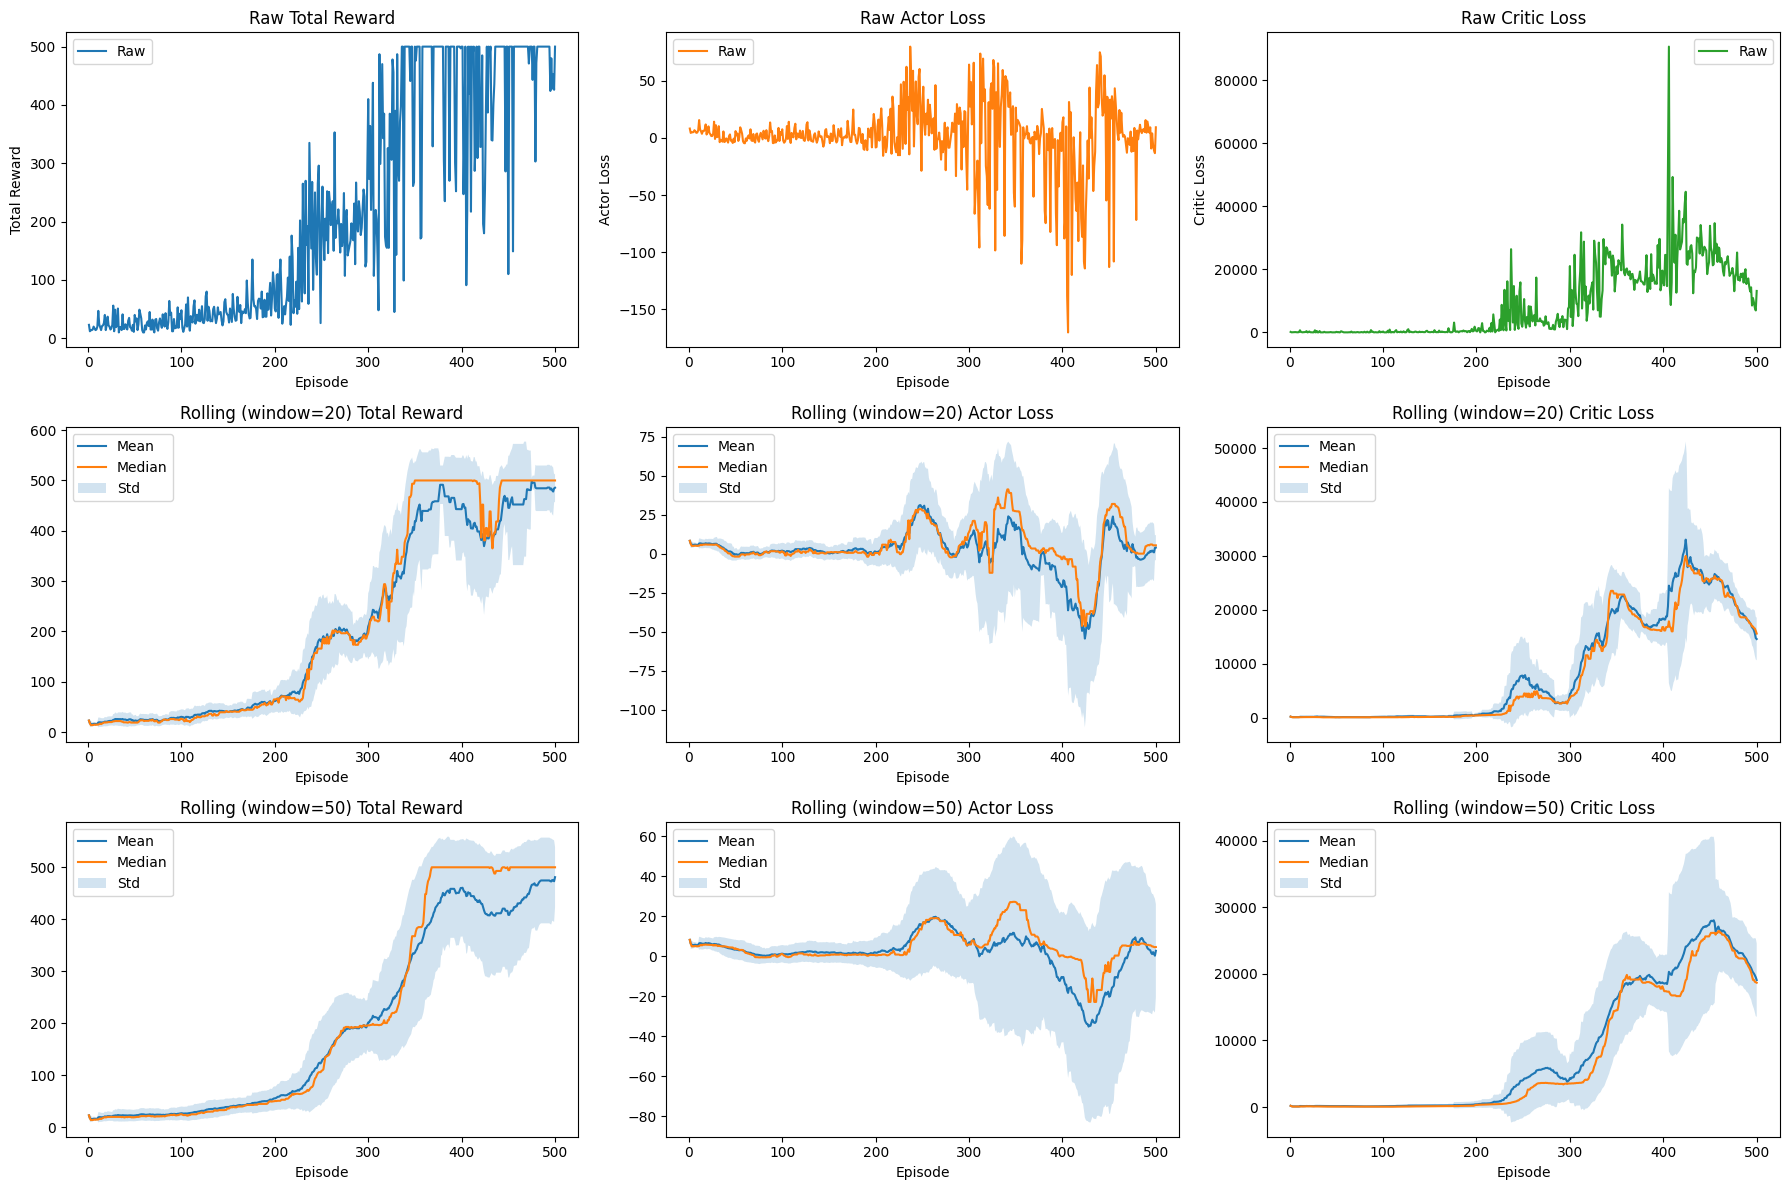

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "Dense",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 500,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 20,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    env = gym.make(config["env_name"])
    env.reset(seed=seed_value)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 1 finished.")

    # --- Save checkpoint ---
    this_stage = 1
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_full'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_cartpole_full.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 200
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 20
  record_history: 1
Creating base environment: CartPole-v1
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...


2025-06-05 12:38:39.598827: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_cartpole_full_1/ckpt-1
Checkpoint restored successfully.
Starting training for 200 episodes...
Episode 20	Total Reward: 500.00	State [-0.5084218   0.15638867  0.01119875 -0.0282129 ]	Actor Loss: -14.1015	Critic Loss: 16137.2715
Episode 40	Total Reward: 500.00	State [ 0.12668248  0.24611604 -0.002879   -0.35107183]	Actor Loss: 6.9282	Critic Loss: 25039.0664
Episode 60	Total Reward: 500.00	State [ 0.0167705   0.17592517  0.02197456 -0.1676123 ]	Actor Loss: 14.4251	Critic Loss: 25261.8633
Episode 80	Total Reward: 500.00	State [ 0.544584    0.15332569  0.0310073  -0.21933801]	Actor Loss: 16.9324	Critic Loss: 24419.0840
Episode 100	Total Reward: 500.00	State [ 0.6149494  -0.1521945   0.02821381  0.34233734]	Actor L

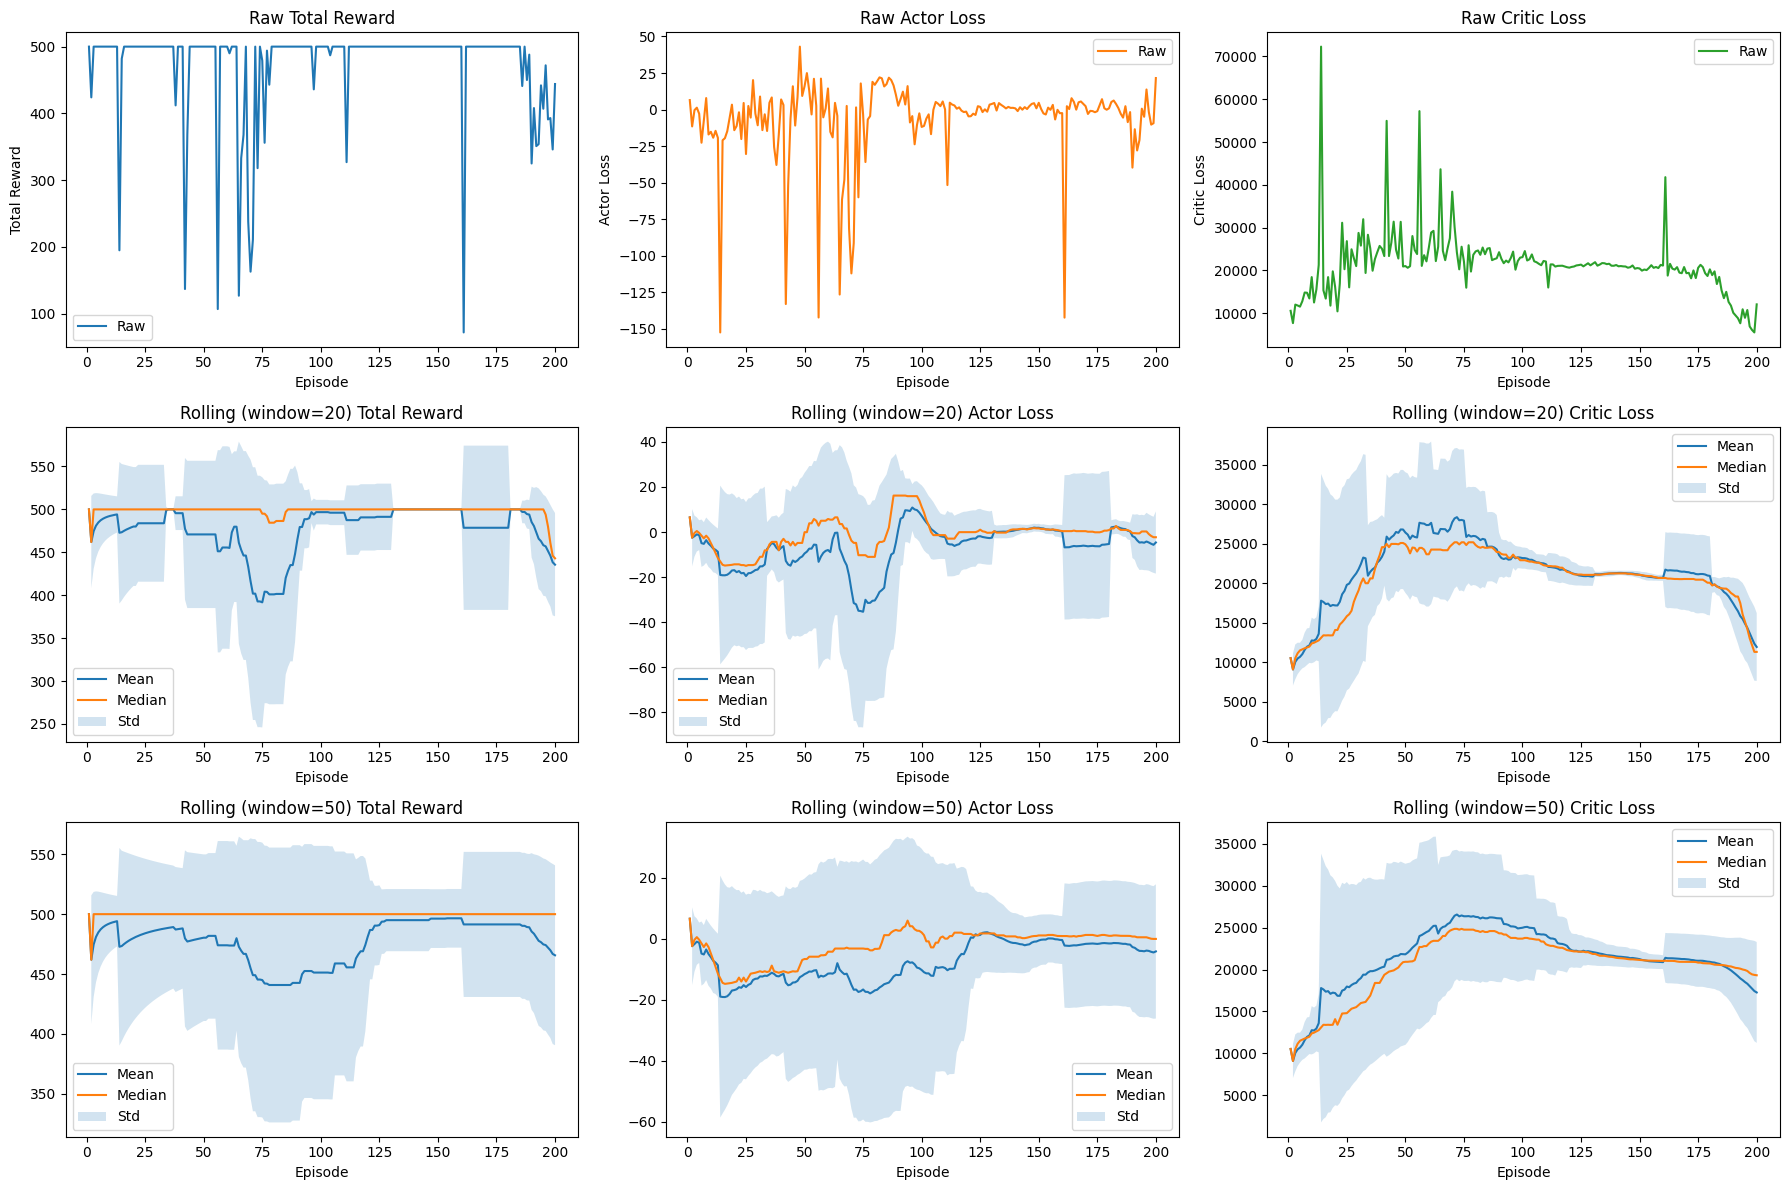

Closing environment...
Done.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "Dense",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 200,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 20,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    env = gym.make(config["env_name"])
    env.reset(seed=seed_value)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_full'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 2 finished.")

    # --- Save checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_full'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_cartpole_full_2.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()

## RNN Full

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 500
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating base environment: CartPole-v1
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...


2025-06-01 19:30:48.213113: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Agent Initialized.
Starting training for 500 episodes...
Episode 100	Total Reward: 9.00	State [-0.057365   -1.129636    0.17989177  1.8704149 ]	Actor Loss: -5.9524	Critic Loss: 104.7845
Episode 200	Total Reward: 24.00	State [ 0.10194268  0.20435624 -0.20270455 -0.5270647 ]	Actor Loss: 2.6604	Critic Loss: 30.4489
Episode 300	Total Reward: 52.00	State [-0.16933797 -0.24451698  0.20669143  0.7157217 ]	Actor Loss: -2.1114	Critic Loss: 128.7110
Episode 400	Total Reward: 271.00	State [-1.0897589  -1.7915974  -0.20252234 -0.7680687 ]	Actor Loss: 11.9434	Critic Loss: 6555.3281
Episode 500	Total Reward: 500.00	State [ 1.1607791   0.16138712  0.0268388  -0.6666985 ]	Actor Loss: 13.3108	Critic Loss: 22528.6797
Training stage 1 finished.
Checkpoint stage 1 saved at: checkpoints/rnn_cartpole_full_1/ckpt-1
Saving masks for stage 1...
Masks saved for stage 1.
Plotting training metrics...


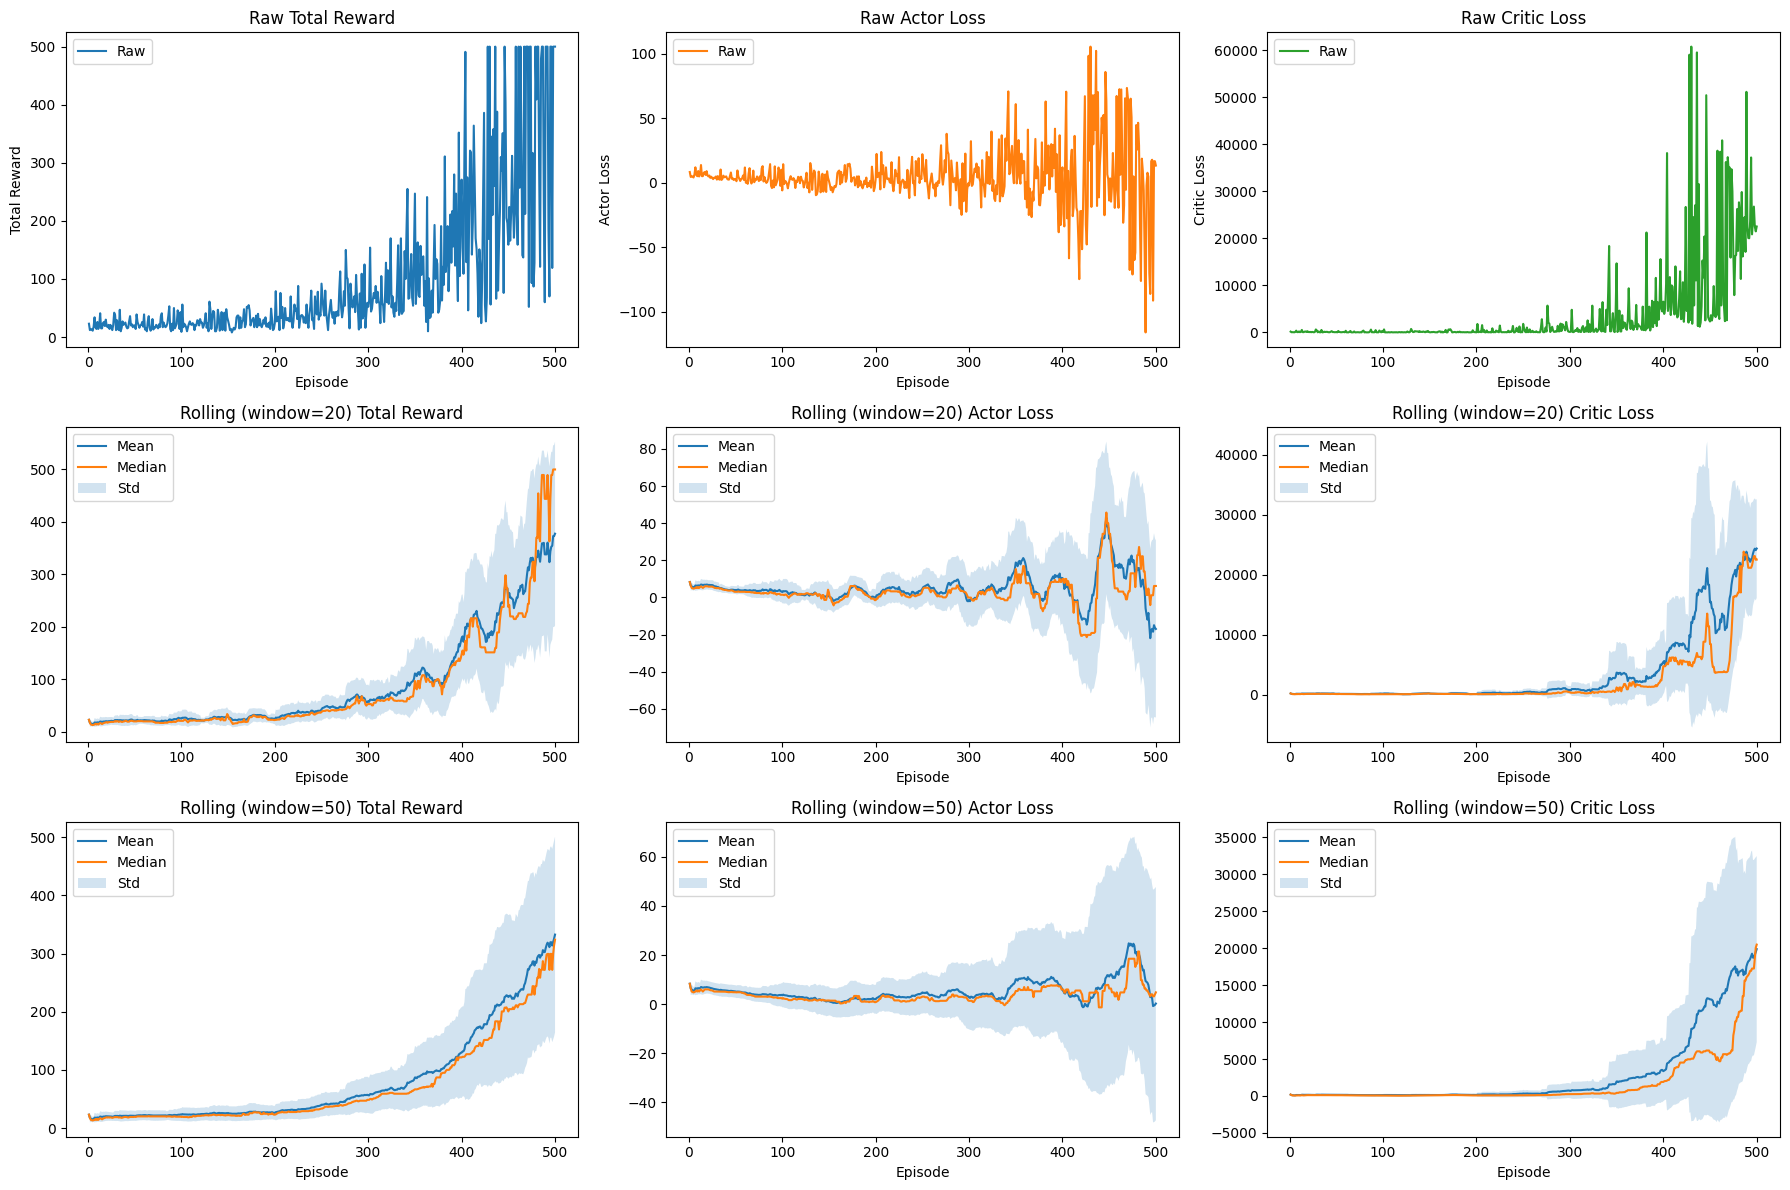

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:510: RuntimeWarning: Mean of empty slice
  first_episode = np.nanmean(tensor[:, :, 0], axis=0)


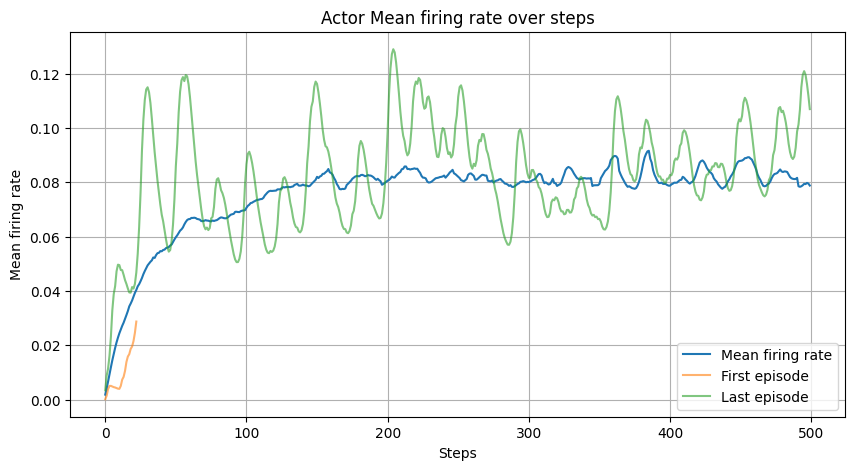

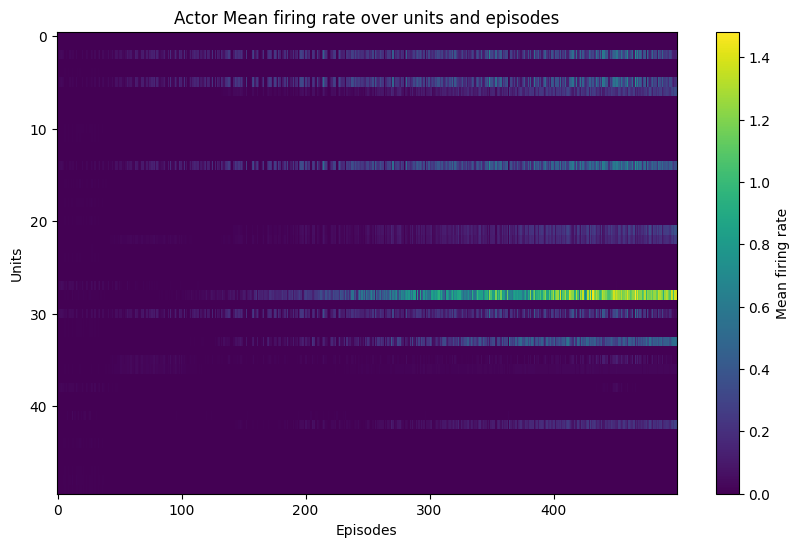

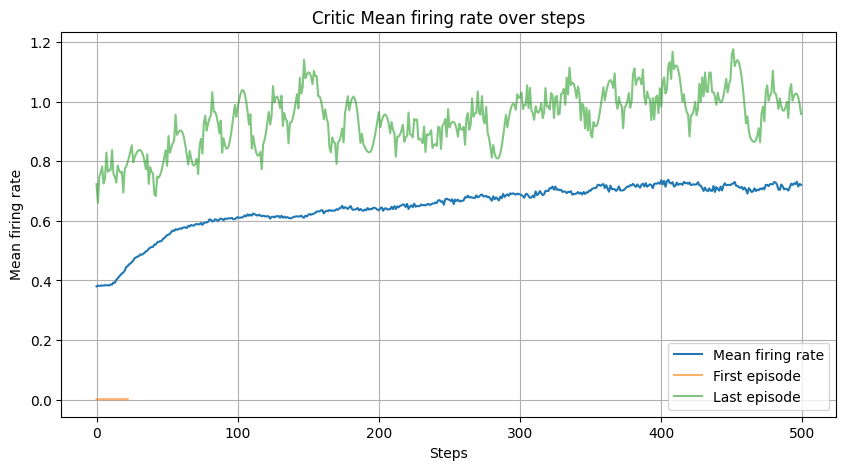

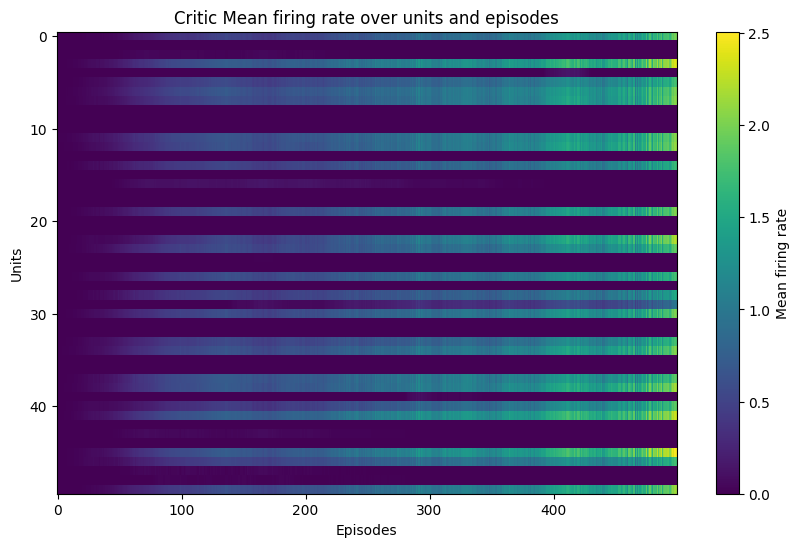

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 500,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    env = gym.make(config["env_name"])
    env.reset(seed=seed_value)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 1 finished.")

    # --- Save checkpoint ---
    this_stage = 1
    this_ckpt_dir = 'checkpoints/rnn_cartpole_full'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / 'rnn_cartpole_full.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: GRU_modified
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 200
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 20
  record_history: 1
Creating base environment: CartPole-v1
Observation size: 4, Action size: 2
Initializing Actor-Critic Agent...


2025-06-01 20:18:54.287732: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/rnn_cartpole_full_1/ckpt-1
Checkpoint restored successfully.
Starting training for 200 episodes...
Episode 20	Total Reward: 172.00	State [-0.7053785  -0.65520644  0.20475756  1.8607461 ]	Actor Loss: -28.7126	Critic Loss: 7067.4663
Episode 40	Total Reward: 174.00	State [ 1.0167128   1.3706572  -0.19530633 -1.1074882 ]	Actor Loss: -92.0135	Critic Loss: 34238.7500
Episode 60	Total Reward: 453.00	State [ 1.0581245  -0.41310826  0.1965199   0.8055399 ]	Actor Loss: -11.2343	Critic Loss: 9988.2412
Episode 80	Total Reward: 500.00	State [ 2.340619    0.51773393 -0.11492155 -0.23613724]	Actor Loss: 44.9372	Critic Loss: 20971.5547
Episode 100	Total Reward: 500.00	State [ 0.66101146  0.2612129  -0.02891377 -0.7545293 ]	Actor Los

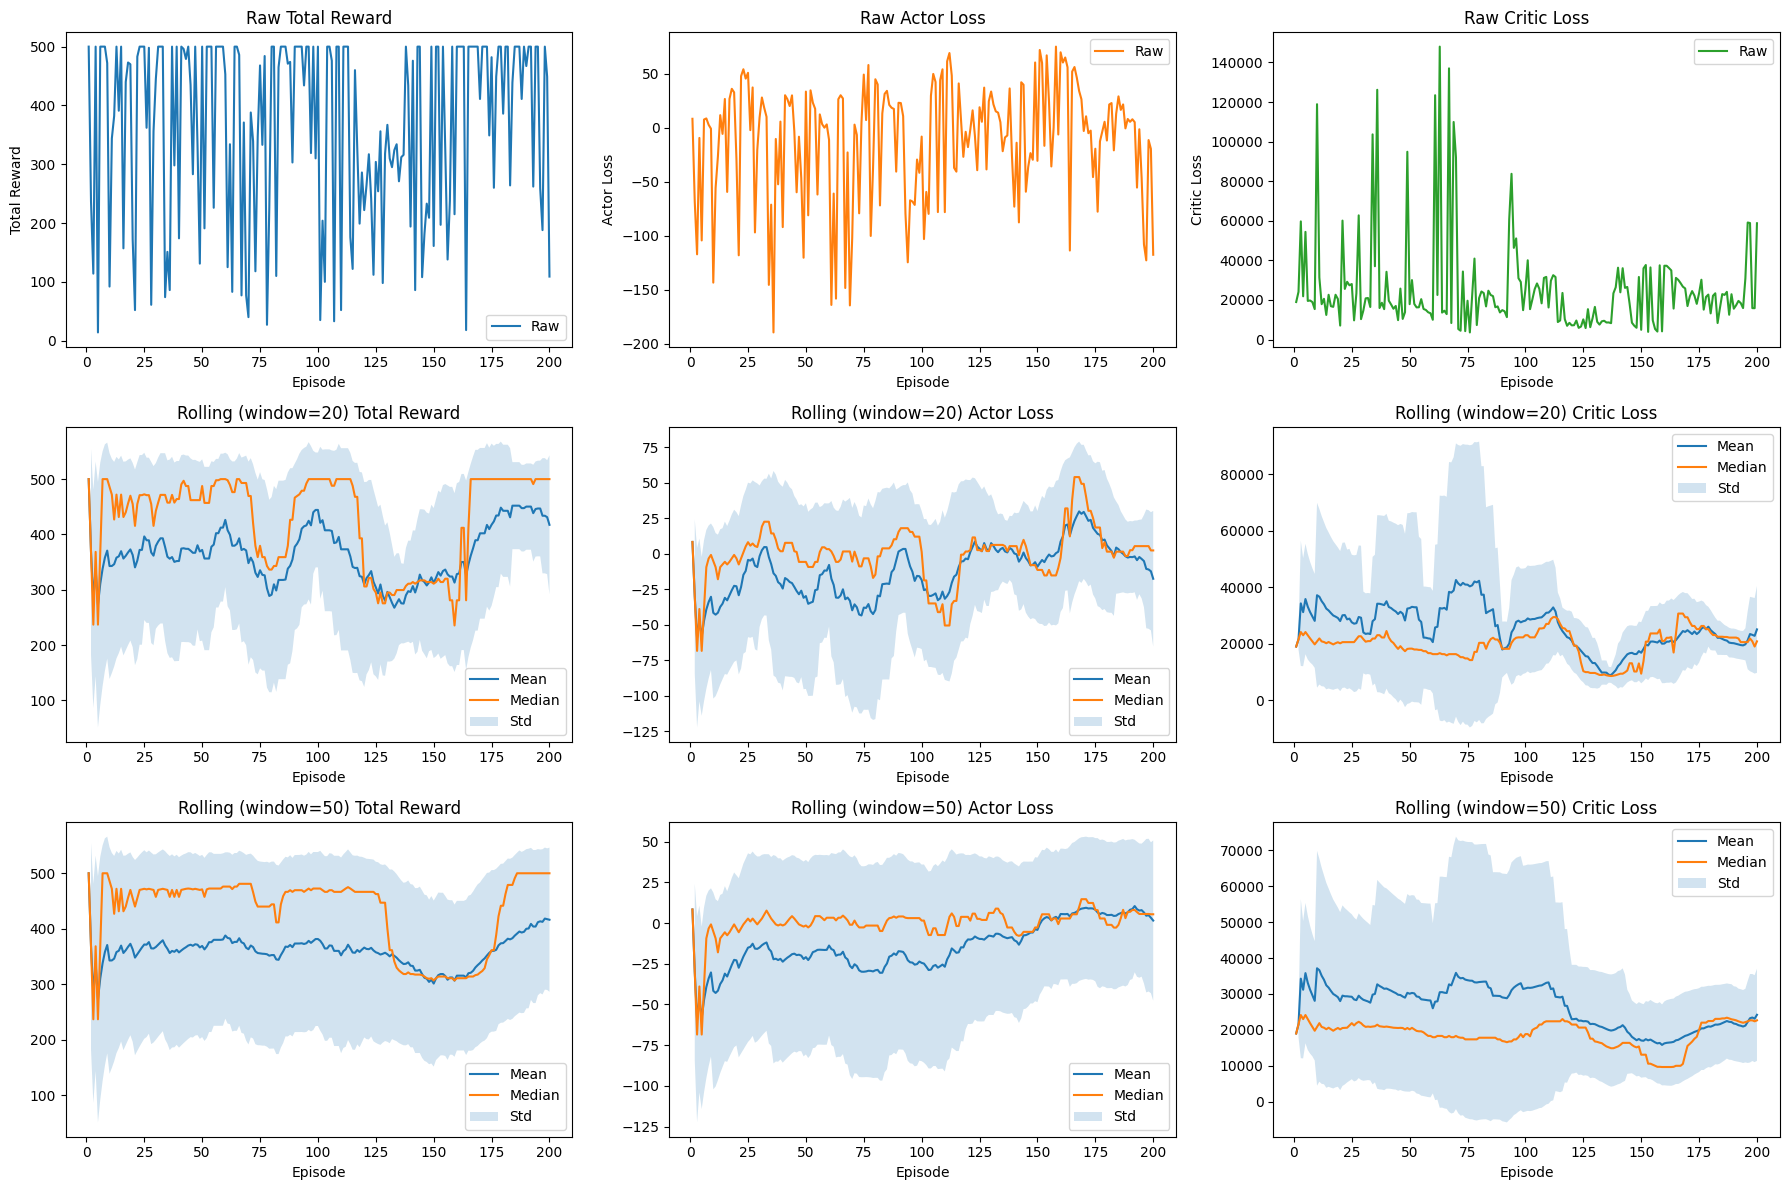

/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/Segundo cuatrimestre/TFM/Código/Modules/helper_functions.py:511: RuntimeWarning: Mean of empty slice
  last_episode = np.nanmean(tensor[:, :, -1], axis=0)


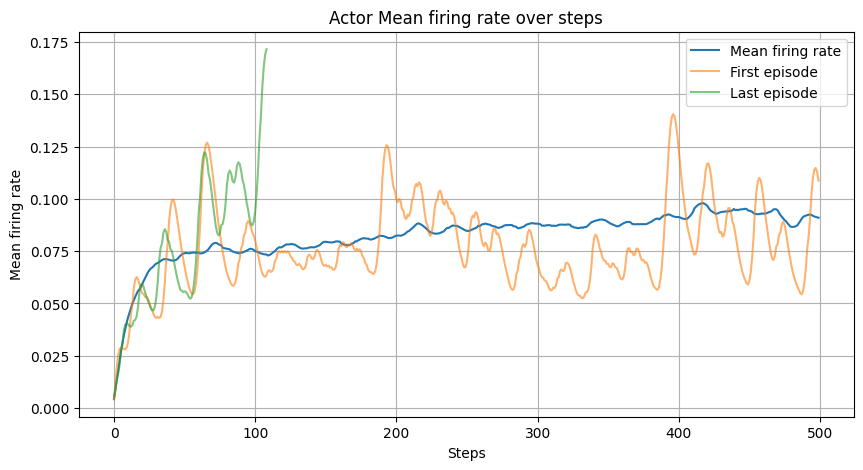

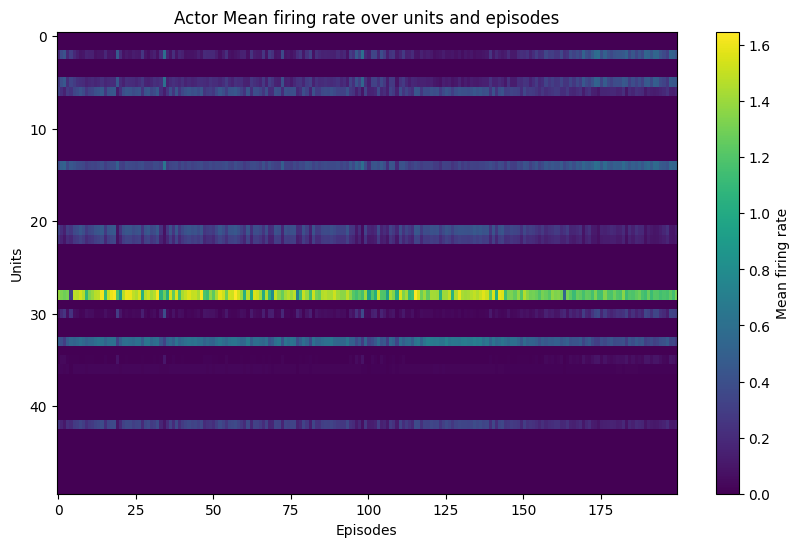

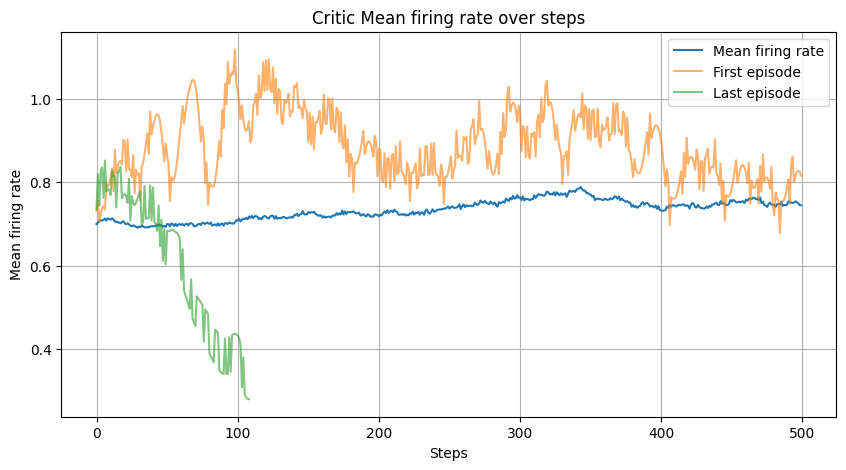

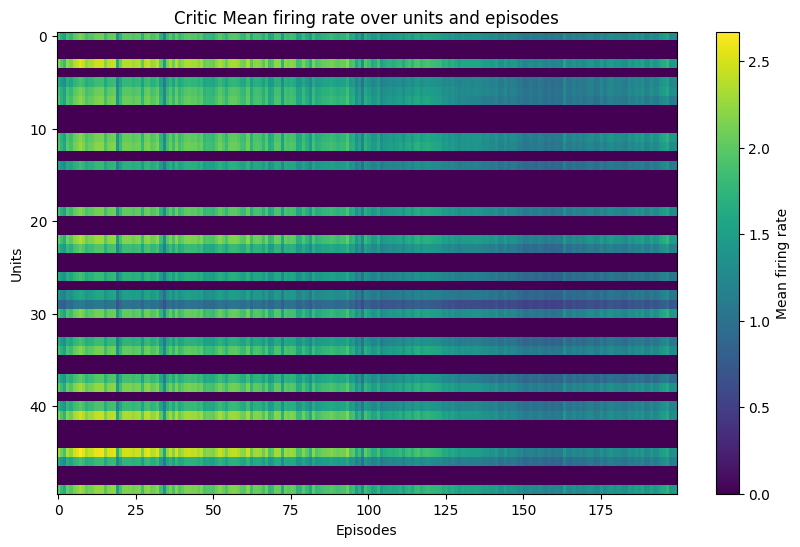

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "GRU_modified",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 200,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 20,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    env = gym.make(config["env_name"])
    env.reset(seed=seed_value)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/rnn_cartpole_full'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 2 finished.")

    # --- Save checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/rnn_cartpole_full'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / 'rnn_cartpole_full_2.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()

## FFNN Partial

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 1500
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Starting training for 1500 episodes...
Episode 100	Total Reward: 10.00	State [-0.13773486  0.18652402]	Actor Loss: -3.2644	Critic Loss: 32.4068
Episode 200	Total Reward: 15.00	State [ 0.1475394 -0.2081497]	Actor Loss: -1.7915	Critic Loss: 23.9175
Episode 300	Total Reward: 66.00	State [0.11686257 0.1878508 ]	Actor Loss: 13.9321	Critic Loss: 778.0290
Episode 400	Total Reward: 43.00	State [-0.271488   -0.20354816]	Actor 

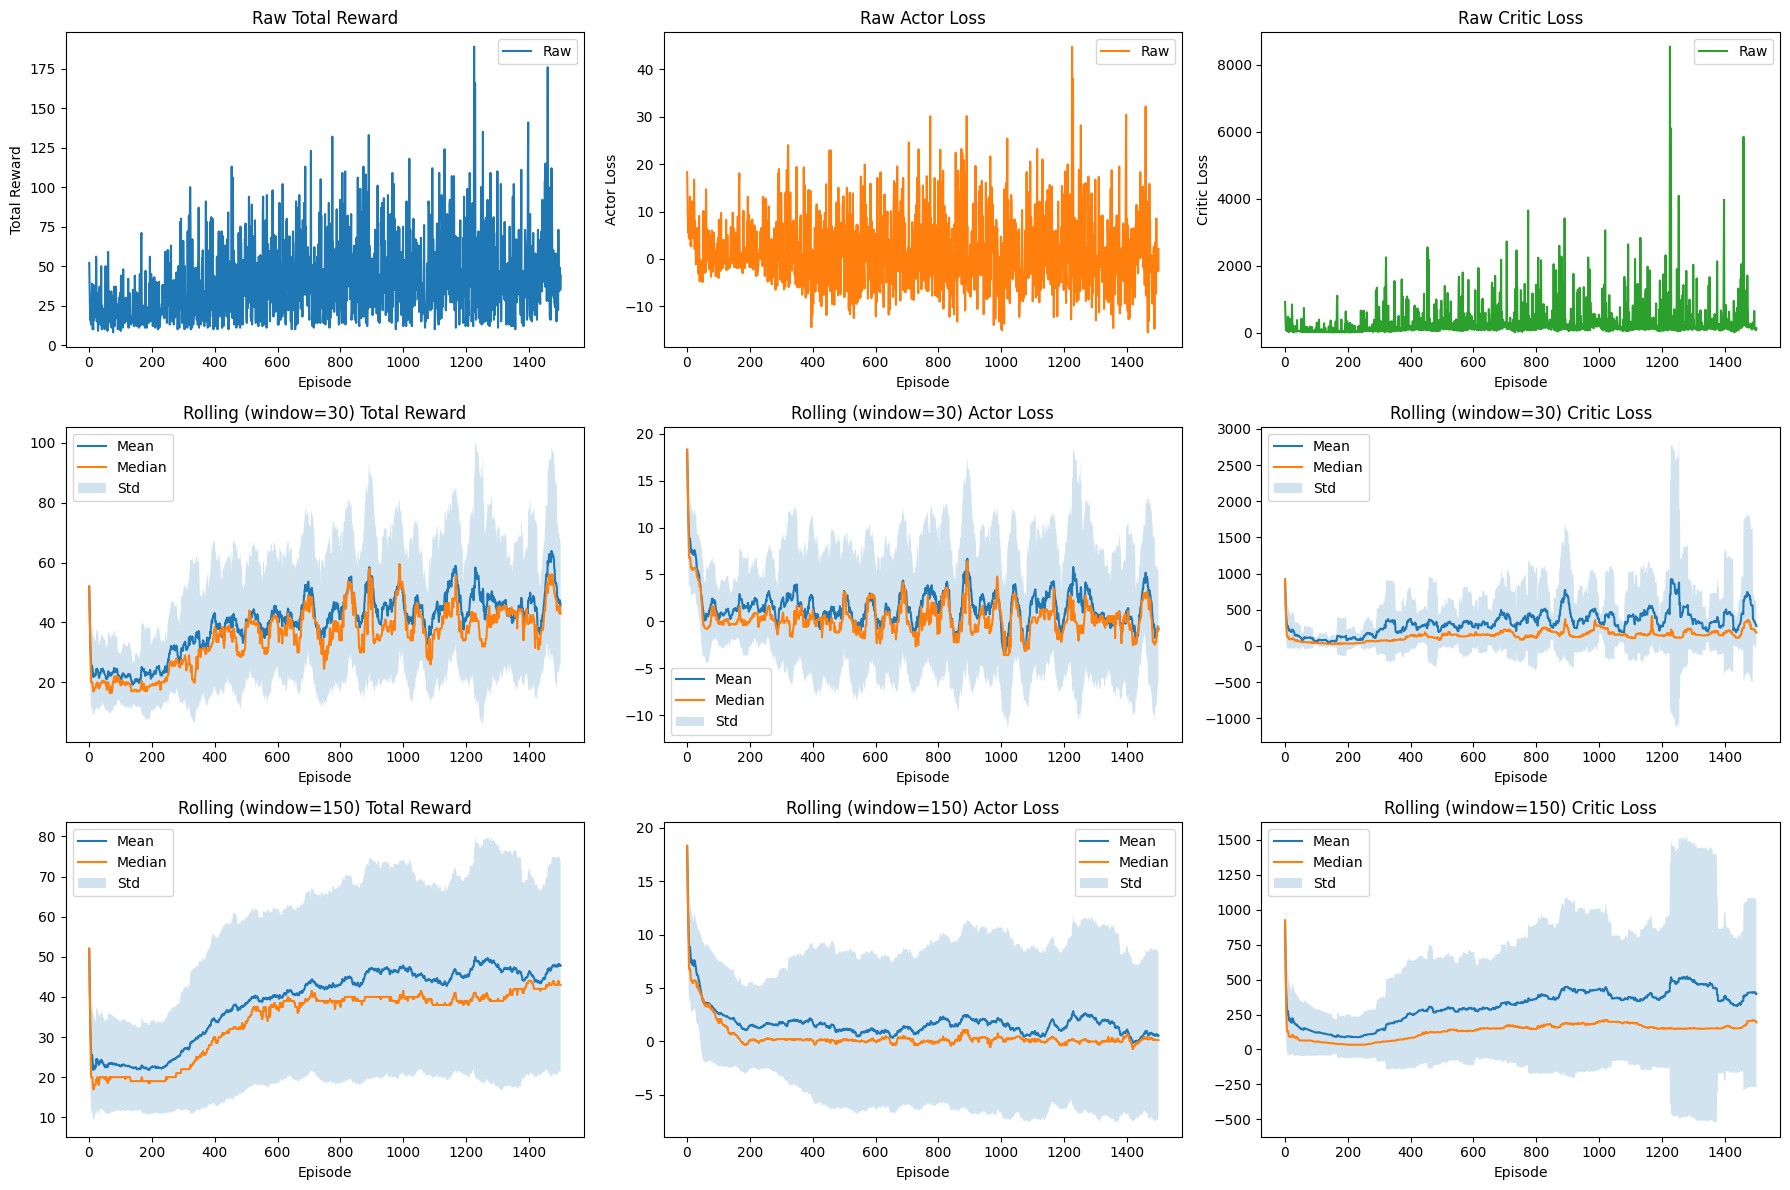

Closing environment...
Done.


In [4]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "Dense",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 1500,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    base_env = gym.make(config["env_name"])
    print("Wrapping base environment for partial observations (position, angle)")
    env = CartPolePartialObservation(base_env)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 1 finished.")

    # --- Save checkpoint ---
    this_stage = 1
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_cartpole_partial.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 500
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...


2025-06-05 13:28:55.438510: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 1...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_cartpole_partial_1/ckpt-1
Checkpoint restored successfully.
Starting training for 500 episodes...
Episode 100	Total Reward: 64.00	State [-0.1493722   0.20388925]	Actor Loss: 2.2971	Critic Loss: 296.4059
Episode 200	Total Reward: 69.00	State [-0.04054317  0.16730806]	Actor Loss: 5.9912	Critic Loss: 537.7460
Episode 300	Total Reward: 33.00	State [-0.20331652  0.17104201]	Actor Loss: -0.8605	Critic Loss: 78.2407
Episode 400	Total Reward: 84.00	State [ 0.50561947 -0.20779698]	Actor Loss: 10.5382	Critic Loss: 909.4030
Episode 500	Total Reward: 40.00	State [-0.38809308  0.20305462]	Actor Loss: -1.5203	Critic Loss: 100.2247
Training stage 2 finished.
Checkpoint stage 2 saved at: checkpoints/2_ffnn_cartpole_partial_2/

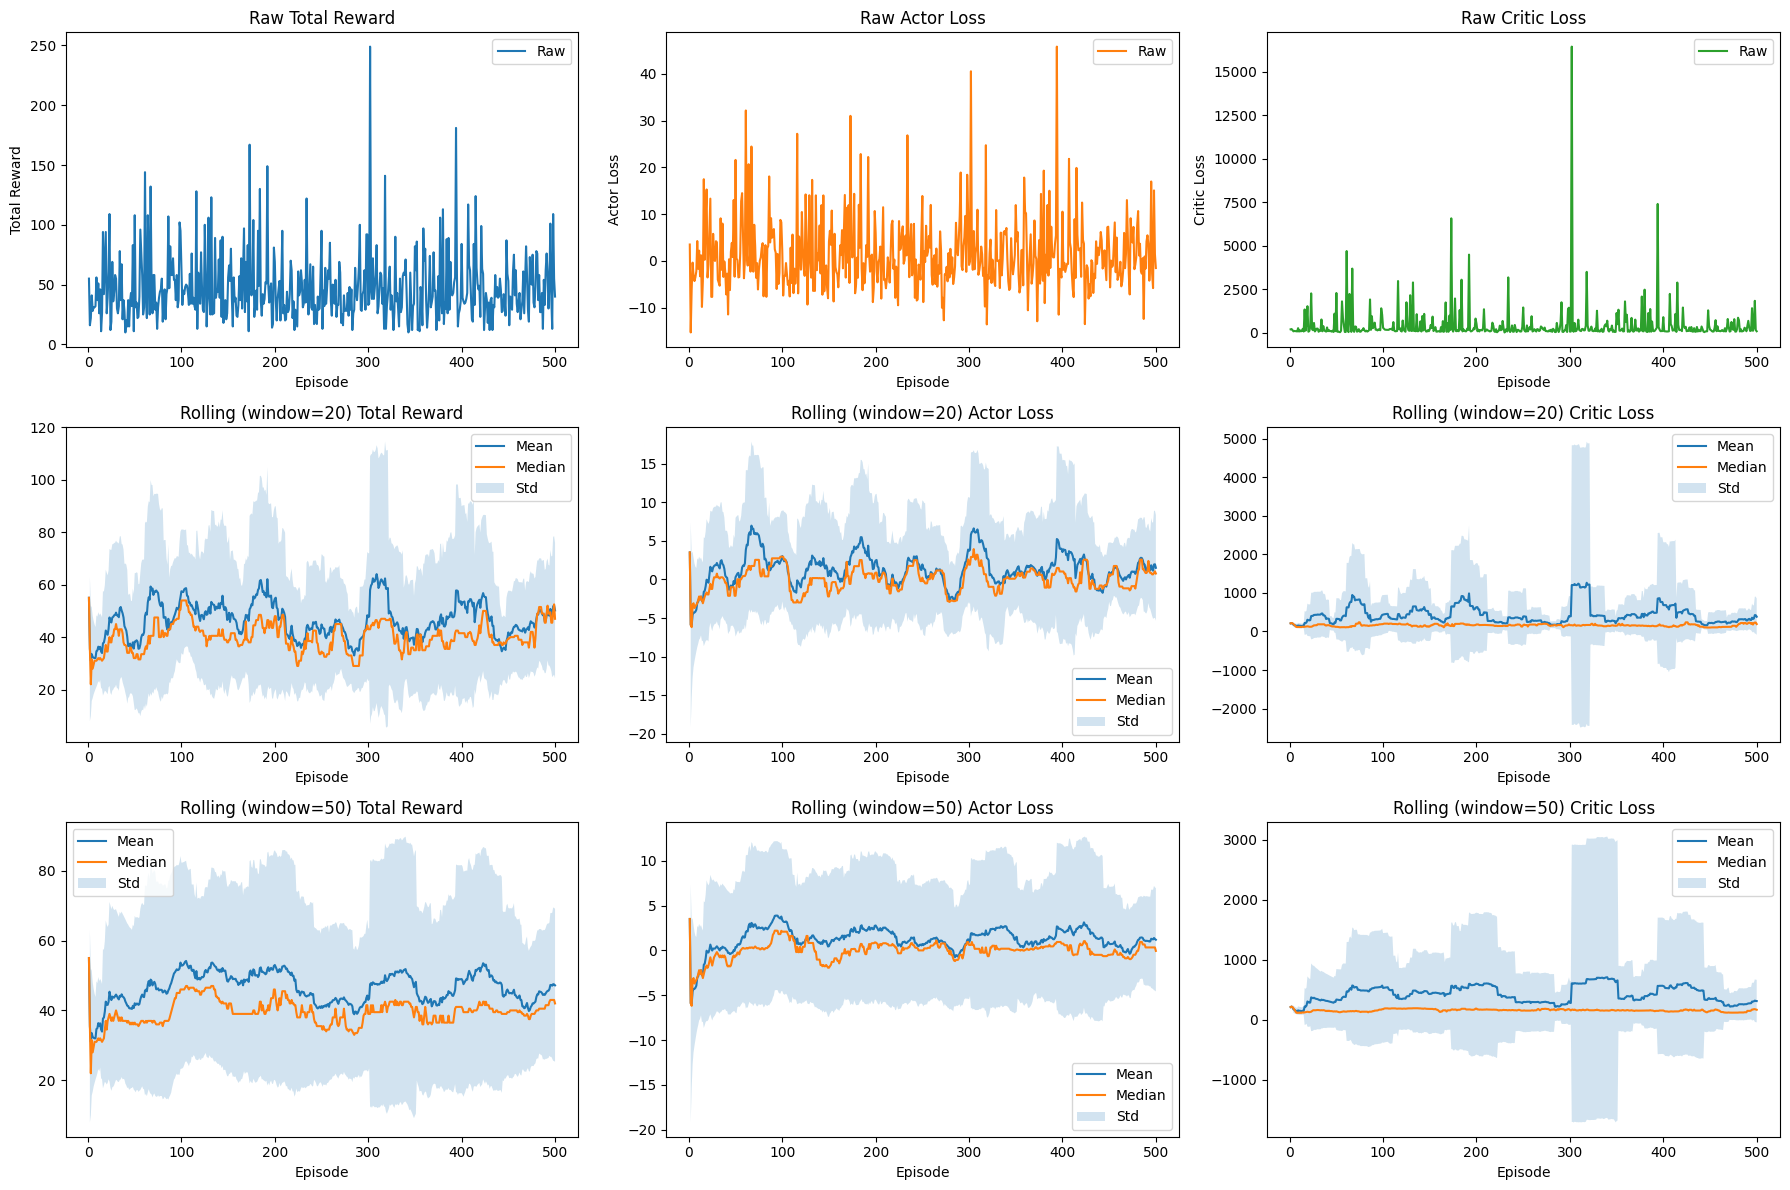

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "Dense",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 500,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    base_env = gym.make(config["env_name"])
    print("Wrapping base environment for partial observations (position, angle)")
    env = CartPolePartialObservation(base_env)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 2 finished.")

    # --- Save checkpoint ---
    this_stage = 2
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_cartpole_partial_2.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 1000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 2...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_cartpole_partial_2/ckpt-1
Checkpoint restored successfully.
Starting training for 1000 episodes...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Episode 100	Total Reward: 15.00	State [ 0.14828788 -0.19511592]	Actor Loss: -8.6143	Critic Loss: 172.6577
Episode 200	Total Reward: 44.00	State [0.13451953 0.1788603 ]	Actor Loss: 0.1445	Critic Loss: 139.3651
Episode 300	Total Reward: 47.00	State [-0.08446848  0.20225441]	Actor Loss: 1.6414	Critic Loss: 124.4463
Episode 400	Total Reward: 67.00	State [-0.2720758   0.18387362]	Actor Loss: 4.6588	Critic Loss: 618.6074
Episode 500	Total Reward: 64.00	State [-0.5329881   0.19869155]	Actor Loss: 7.1404	Critic Loss: 350.7372
Episode 600	Total Reward: 55.00	State [ 0.42564774 -0.19307339]	Actor Loss: 0.0765	Critic Loss: 226.2374
Episode 700	Total Reward: 40.00	State [ 0.23308307 -0.189852  ]	Actor Loss: -2.4890	Critic Loss: 97.6649
Episode 800	Total Reward: 44.00	State [ 0.19816531 -0.1889661 ]	Actor Loss: 1.3700	Critic Loss: 86.7244
Episode 900	Total Reward: 53.00	State [ 0.05424415 -0.20541912]	Actor Loss: 1.4172	Critic Loss: 144.9544
Episode 1000	Total Reward: 73.00	State [ 0.35228956 -0.18

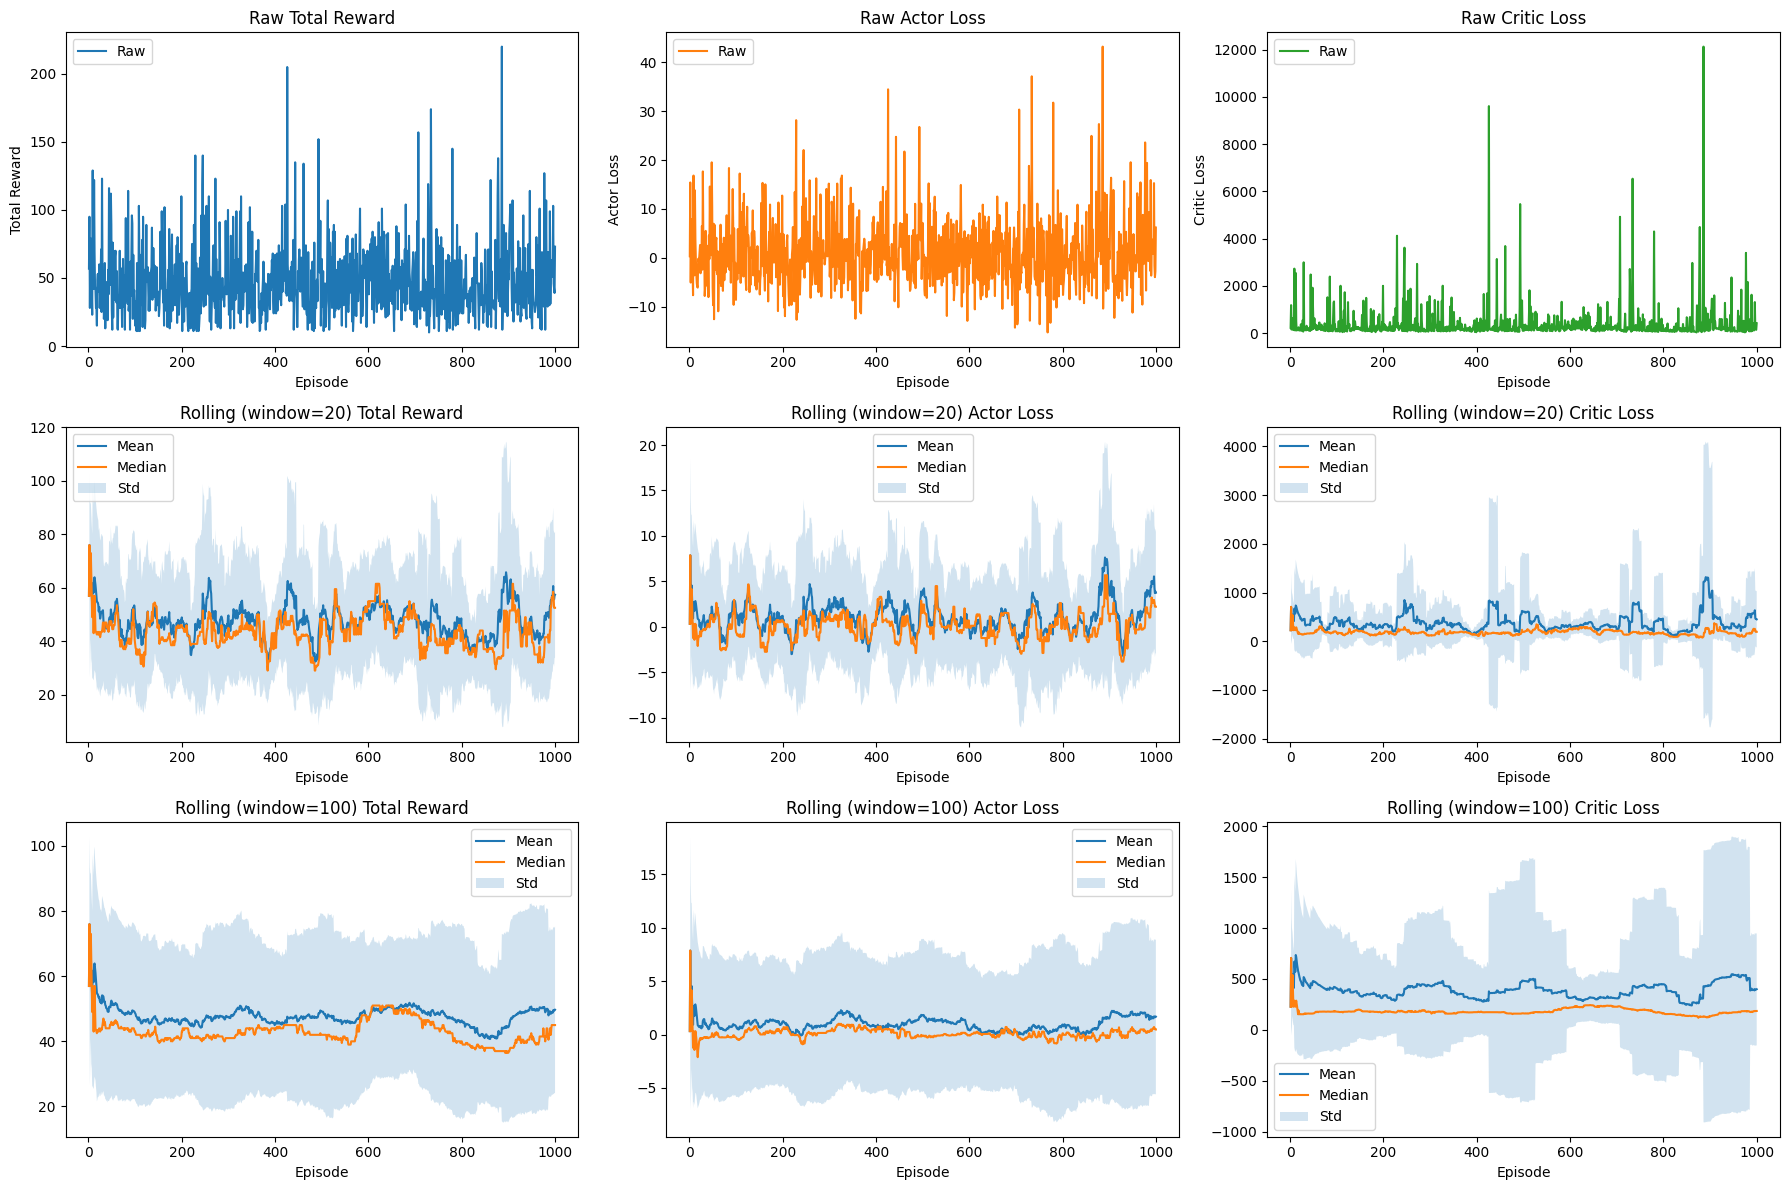

Closing environment...
Done.


: 

In [ ]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "Dense",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 1000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    base_env = gym.make(config["env_name"])
    print("Wrapping base environment for partial observations (position, angle)")
    env = CartPolePartialObservation(base_env)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 3 finished.")

    # --- Save checkpoint ---
    this_stage = 3
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_cartpole_partial_3.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 2000
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...


2025-06-05 14:10:43.080963: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 3...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_cartpole_partial_3/ckpt-1
Checkpoint restored successfully.
Starting training for 2000 episodes...
Episode 100	Total Reward: 46.00	State [0.00257375 0.18045837]	Actor Loss: 2.8987	Critic Loss: 210.6098
Episode 200	Total Reward: 43.00	State [-0.21133915  0.17179027]	Actor Loss: -0.1958	Critic Loss: 91.2379
Episode 300	Total Reward: 63.00	State [ 0.29982835 -0.20036873]	Actor Loss: 4.7556	Critic Loss: 398.6345
Episode 400	Total Reward: 52.00	State [ 0.29042816 -0.19737606]	Actor Loss: 1.1561	Critic Loss: 109.8646
Episode 500	Total Reward: 46.00	State [ 0.22010446 -0.20172985]	Actor Loss: -0.7458	Critic Loss: 136.7048
Episode 600	Total Reward: 84.00	State [-0.03686567  0.19406688]	Actor Loss: 7.8501	Critic Loss: 

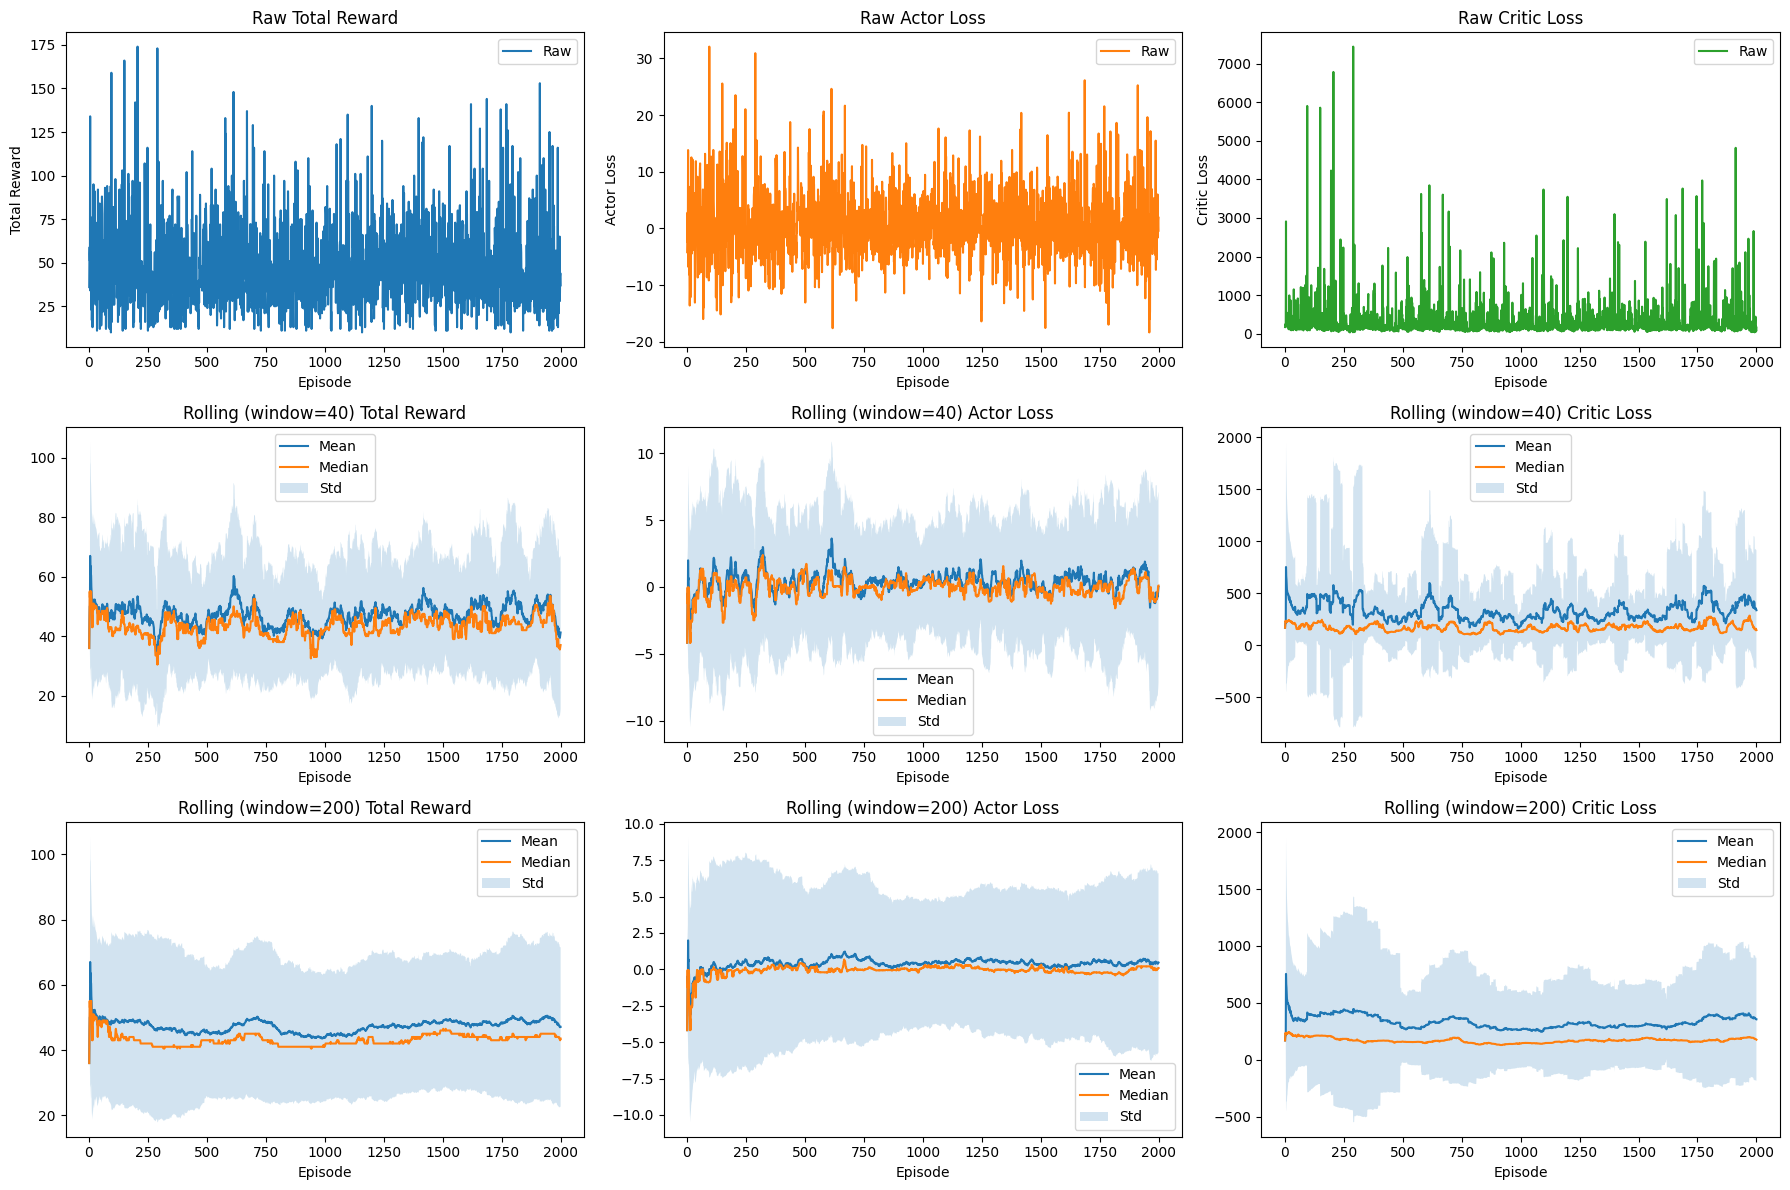

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "Dense",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 2000,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    base_env = gym.make(config["env_name"])
    print("Wrapping base environment for partial observations (position, angle)")
    env = CartPolePartialObservation(base_env)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 4 finished.")

    # --- Save checkpoint ---
    this_stage = 4
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_cartpole_partial_4.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 1500
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...
Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 4...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_cartpole_partial_4/ckpt-1
Checkpoint restored successfully.
Starting training for 1500 episodes...


/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Episode 100	Total Reward: 101.00	State [0.16218714 0.16300127]	Actor Loss: 13.8528	Critic Loss: 1555.1976
Episode 200	Total Reward: 43.00	State [-0.03927314  0.2081271 ]	Actor Loss: 1.4375	Critic Loss: 145.7142
Episode 300	Total Reward: 39.00	State [-0.21033695  0.1939796 ]	Actor Loss: -0.3309	Critic Loss: 102.8178
Episode 400	Total Reward: 52.00	State [-0.16308425  0.20438638]	Actor Loss: 0.4502	Critic Loss: 146.2061
Episode 500	Total Reward: 40.00	State [-0.06691658  0.17969297]	Actor Loss: -1.1418	Critic Loss: 95.2758
Episode 600	Total Reward: 42.00	State [-0.21089488  0.19268811]	Actor Loss: 0.2855	Critic Loss: 87.6486
Episode 700	Total Reward: 66.00	State [0.1523416  0.18254454]	Actor Loss: 1.3400	Critic Loss: 437.2869
Episode 800	Total Reward: 61.00	State [-0.0061104  -0.19757865]	Actor Loss: 1.3854	Critic Loss: 296.8309
Episode 900	Total Reward: 25.00	State [ 0.10620236 -0.19850586]	Actor Loss: -1.5057	Critic Loss: 35.3034
Episode 1000	Total Reward: 27.00	State [ 0.1964225  -0.2

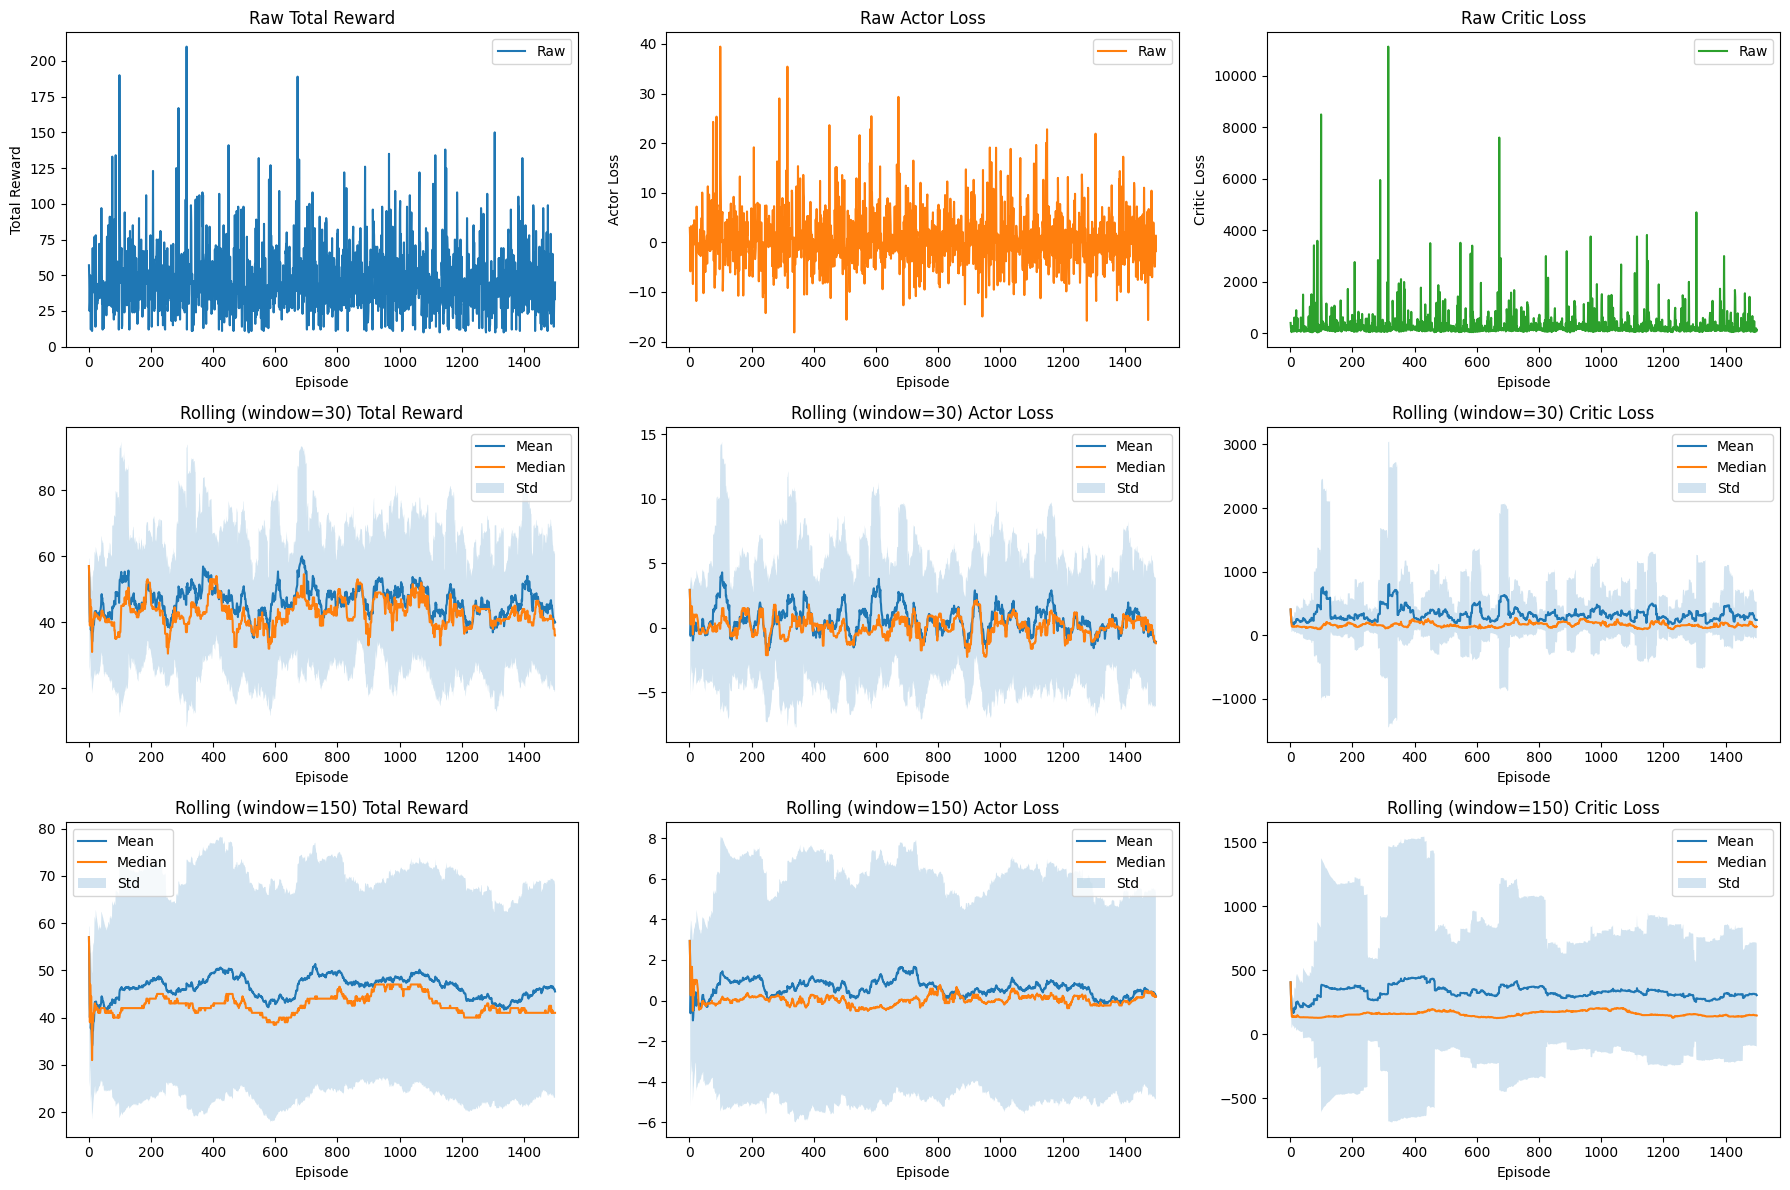

Closing environment...
Done.


In [3]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "Dense",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 1500,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    base_env = gym.make(config["env_name"])
    print("Wrapping base environment for partial observations (position, angle)")
    env = CartPolePartialObservation(base_env)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 5 finished.")

    # --- Save checkpoint ---
    this_stage = 5
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_cartpole_partial_5.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()

Configuration loaded:
  env_name: CartPole-v1
  noise_std: 0.01
  actor_hidden_size: 50
  critic_hidden_size: 50
  actor_layers: 1
  critic_layers: 1
  layer_type: Dense
  actor_prob_connection: 0.1
  critic_prob_connection: 1.0
  actor_lr: 0.004
  critic_lr: 0.004
  num_episodes: 1500
  gamma: 1.0
  l2_actor: 0.0001
  l2_critic: 0.0001
  print_interval: 100
  record_history: 1
Creating base environment: CartPole-v1
Wrapping base environment for partial observations (position, angle)
Observation size: 2, Action size: 2
Initializing Actor-Critic Agent...


2025-06-05 15:04:54.154035: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'actor_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/mnt/c/Users/imcir/Desktop/CIENCIA DATOS/cienciadatosenv/lib/python3.12/site-packages/keras/src/layers/layer.py:396: UserWarning: `build()` was called on layer 'critic_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be m

Agent Initialized.
Actor and Critic networks built.
Performing dummy forward to build cells and weights for mask loading...
Loading masks from stage 5...
Masks loaded.
Initializing optimizers with dummy step...
Optimizers initialized.
Restoring from checkpoint: checkpoints/2_ffnn_cartpole_partial_5/ckpt-1
Checkpoint restored successfully.
Starting training for 1500 episodes...
Episode 100	Total Reward: 32.00	State [-0.11312918  0.19786364]	Actor Loss: -2.0503	Critic Loss: 84.5520
Episode 200	Total Reward: 77.00	State [-0.22642507 -0.20904748]	Actor Loss: 6.4378	Critic Loss: 600.2348
Episode 300	Total Reward: 60.00	State [-0.1944592   0.18203399]	Actor Loss: 2.2771	Critic Loss: 272.9891
Episode 400	Total Reward: 38.00	State [ 0.2722233  -0.17901187]	Actor Loss: 3.1714	Critic Loss: 89.9522
Episode 500	Total Reward: 51.00	State [ 0.03167176 -0.20911641]	Actor Loss: 1.8972	Critic Loss: 250.0329
Episode 600	Total Reward: 25.00	State [ 0.10950638 -0.17530642]	Actor Loss: -4.9804	Critic Loss:

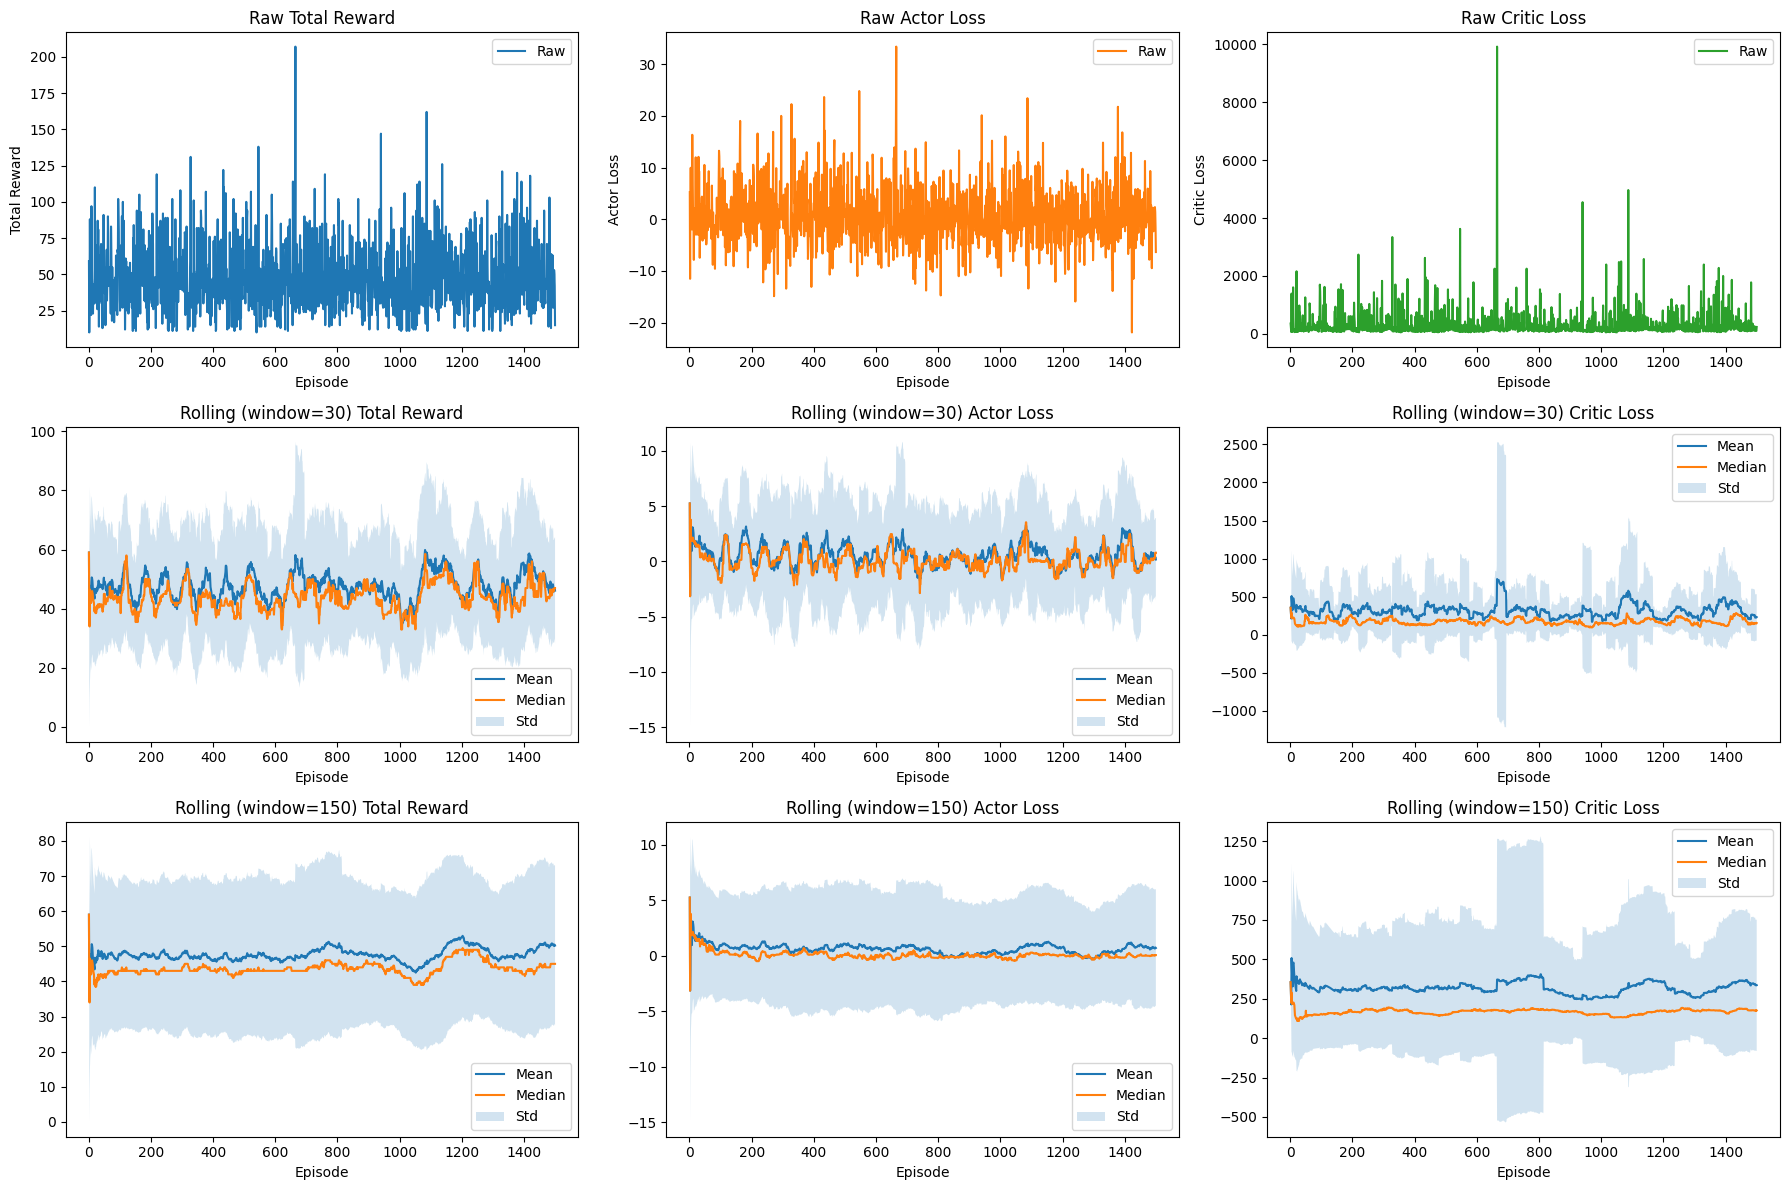

Closing environment...
Done.


In [2]:
def main():
    # --- Training Configuration ---
    config = {
        # Environment params
        "env_name": "CartPole-v1",
        "noise_std": 0.01,
        # Agent architecture
        "actor_hidden_size": 50,
        "critic_hidden_size": 50,
        "actor_layers": 1,
        "critic_layers": 1,
        "layer_type": "Dense",
        "actor_prob_connection": 0.1,
        "critic_prob_connection": 1.0,
        # Training hyperparams
        "actor_lr": 4e-3,
        "critic_lr": 4e-3,
        "num_episodes": 1500,
        "gamma": 1.0,
        "l2_actor": 1e-4,
        "l2_critic": 1e-4,
        # Training process
        "print_interval": 100,
        "record_history": 1
    }
    
    print("Configuration loaded:")
    for key, value in config.items():
        print(f"  {key}: {value}")

    # --- Environment Setup ---
    print(f"Creating base environment: {config['env_name']}")
    base_env = gym.make(config["env_name"])
    print("Wrapping base environment for partial observations (position, angle)")
    env = CartPolePartialObservation(base_env)

    obs_size = env.observation_space.shape[0]
    act_size = env.action_space.n
    print(f"Observation size: {obs_size}, Action size: {act_size}")

    # --- Agent Setup ---
    print("Initializing Actor-Critic Agent...")
    agent = ActorCriticAgent(
        obs_size=obs_size,
        act_size=act_size,
        actor_hidden_size=config["actor_hidden_size"],
        critic_hidden_size=config["critic_hidden_size"],
        actor_layers=config["actor_layers"],
        critic_layers=config["critic_layers"],
        actor_lr=config["actor_lr"],
        critic_lr=config["critic_lr"],
        actor_prob_connection=config["actor_prob_connection"],
        critic_prob_connection=config["critic_prob_connection"],
        layer_type=config["layer_type"]
    )
    print("Agent Initialized.")

    # --- Load checkpoint ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    load_model(agent, obs_size, act_size, this_stage, this_ckpt_dir)

    # --- Training ---
    print(f"Starting training for {config['num_episodes']} episodes...")
    total_rewards_history, actor_loss_history, critic_loss_history, actor_firing_rates, critic_firing_rates, measurements_coherences = train_agent(
        env=env,
        agent=agent,
        num_episodes=config['num_episodes'],
        gamma=config['gamma'],
        print_interval=config['print_interval'],
        l2_actor=config['l2_actor'],
        l2_critic=config['l2_critic'],
        record_history=config['record_history']
    )
    print("Training stage 6 finished.")

    # --- Save checkpoint ---
    this_stage = 6
    this_ckpt_dir = 'checkpoints/2_ffnn_cartpole_partial'
    save_model(agent, this_stage, this_ckpt_dir)

    # --- Save outputs ---
    output_dir  = Path.cwd() / "outputs"
    output_dir.mkdir(parents=True, exist_ok=True)
    output_file = output_dir / '2_ffnn_cartpole_partial_6.pkl'
    with open(output_file, "wb") as f:
        pickle.dump((
            total_rewards_history,
            actor_loss_history,
            critic_loss_history,
            actor_firing_rates,
            critic_firing_rates,
            measurements_coherences
        ), f)

    # --- Plot Metrics & Psych Curve ---
    print("Plotting training metrics...")
    plot_metrics(
        total_rewards_history,
        actor_loss_history,
        critic_loss_history,
        window_1=max(20, config['num_episodes']//50),
        window_2=max(50, config['num_episodes']//10)
    )

    plot_firing_rates(actor_firing_rates, critic_firing_rates)

    # --- Cleanup ---
    print("Closing environment...")
    env.close()
    print("Done.")

if __name__ == '__main__':
    main()